In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import asdict, is_dataclass, dataclass
from pandas.api.types import is_datetime64_any_dtype
import scipy
import numpy as np
import polars as pl
from typing import Dict, List
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from src.common.AssetData import AssetData
from src.common.AssetDataPolars import AssetDataPolars
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.databaseService.OutsourceLoader import OutsourceLoader

from src.simulation.SimulatePortfolio import SimulatePortfolio
from src.strategy.StratBuyAndHold import StratBuyAndHold
from src.simulation.ResultAnalyzer import ResultAnalyzer
from src.common.AssetFileInOut import AssetFileInOut
from src.predictionModule.FourierML import FourierML
from src.common.DataFrameTimeOperations import DataFrameTimeOperationsPandas as DFTO
from src.predictionModule.CollectionModels import CollectionModels
from src.common.AssetFileInOut import AssetFileInOut

from src.common.AssetDataPolars import AssetDataPolars
from src.common.AssetDataService import AssetDataService
from src.predictionModule.ModelAnalyzer import ModelAnalyzer


In [3]:
assets=AssetFileInOut("../src/stockGroups/bin").loadDictFromFile("group_snp500_over20years")

# Convert to Polars for speedup
assetspl: Dict[str, AssetDataPolars] = {}
for ticker, asset in assets.items():
    assetspl[ticker]= AssetDataService.to_polars(asset)

In [ ]:
startTrainDate=pd.Timestamp(year=2019, month=1, day=4, tz='UTC')
endTrainDate=pd.Timestamp(year=2019, month=2, day=4, tz='UTC')
startTestDate=pd.Timestamp(year=2019, month=2, day=5, tz='UTC')
params = {
        'idxLengthOneMonth': 21,
        'fouriercutoff': 100,
        'spareDatesRatio': 0.1,
        'multFactor': 8,
        'lenClassInterval': 1,
        'daysAfterPrediction': +1,
        'numOfMonths': 13,
        'classificationInterval': [0.0045], 
    }
fourierTestML = FourierML(assetspl, 
                trainStartDate = startTrainDate,
                trainEndDate = endTrainDate,
                testStartDate = startTestDate,
                testEndDate = startTestDate+ pd.Timedelta(days=10),
                params=params)

fourierTestML.prepareData()

Processing asset: MMM.  Processed 0 out of 392.
Processing asset: AOS.  Processed 1 out of 392.
Processing asset: ABT.  Processed 2 out of 392.
Processing asset: ACN.  Processed 3 out of 392.
Processing asset: AES.  Processed 4 out of 392.
Processing asset: AFL.  Processed 5 out of 392.
Processing asset: A.  Processed 6 out of 392.
Processing asset: APD.  Processed 7 out of 392.
Processing asset: ALB.  Processed 8 out of 392.
Processing asset: ARE.  Processed 9 out of 392.
Processing asset: LNT.  Processed 10 out of 392.
Processing asset: ALL.  Processed 11 out of 392.
Processing asset: MO.  Processed 12 out of 392.
Processing asset: AEE.  Processed 13 out of 392.
Processing asset: AEP.  Processed 14 out of 392.
Processing asset: AXP.  Processed 15 out of 392.
Processing asset: AIG.  Processed 16 out of 392.
Processing asset: AMT.  Processed 17 out of 392.
Processing asset: AME.  Processed 18 out of 392.
Processing asset: APH.  Processed 19 out of 392.
Processing asset: AON.  Processed

In [5]:
fourierTestML.X_train.shape
fourierTestML.X_test.shape

(392, 99)

In [6]:
fourierTestML.traintestXGBModel()

[0]	validation_0-mlogloss:1.09798
[100]	validation_0-mlogloss:1.06296
[200]	validation_0-mlogloss:1.05255
[300]	validation_0-mlogloss:1.04614
[400]	validation_0-mlogloss:1.04484
[499]	validation_0-mlogloss:1.04417

Test accuracy: 0.4617
Test log loss: 1.0442


In [7]:
fourierTestML.traintestLSTMModel()

Epoch 1/20


c:\Users\kimer\Desktop\RandomOdyssey\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.4460 - mae: 0.4460 - val_loss: 0.1457 - val_mae: 0.1457
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1657 - mae: 0.1657 - val_loss: 0.1725 - val_mae: 0.1725
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.0816 - val_mae: 0.0816
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0804 - mae: 0.0804 - val_loss: 0.0935 - val_mae: 0.0935
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mae: 0.0693 - val_loss: 0.0528 - val_mae: 0.0528
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mae: 0.0657 - val_loss: 0.0634 - val_mae: 0.0634
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mae: 0.0580 - val_loss: 0.0543 - val_mae: 0.0543
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mae: 0.0543 - val_loss: 0.0499 - val_mae: 0.0499
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0523 - mae: 0.0523 - val_loss: 0.0491 - 

In [8]:
assetspl["IRM"].adjClosePrice

Date,AdjClose
"datetime[ns, UTC]",f64
1996-02-01 00:00:00 UTC,1.219476
1996-02-02 00:00:00 UTC,1.22893
1996-02-05 00:00:00 UTC,1.210024
1996-02-06 00:00:00 UTC,1.210024
1996-02-07 00:00:00 UTC,1.210024
…,…
2024-11-13 00:00:00 UTC,115.980003
2024-11-14 00:00:00 UTC,113.120003
2024-11-15 00:00:00 UTC,114.879997


In [9]:
fourierTestML.predictNextPrices(assetspl["IRM"].adjClosePrice["AdjClose"].slice(5000,21*13))

2

c:\Users\kimer\Desktop\RandomOdyssey\src\predictionModule\ModelAnalyzer.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=label_data, palette=palette)


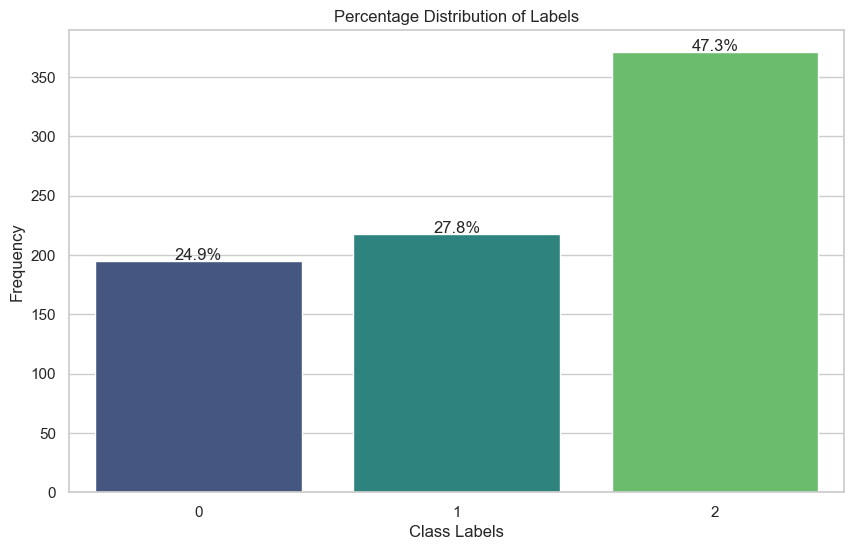

Sum of squared percentages: 0.3631


<Figure size 1000x800 with 0 Axes>

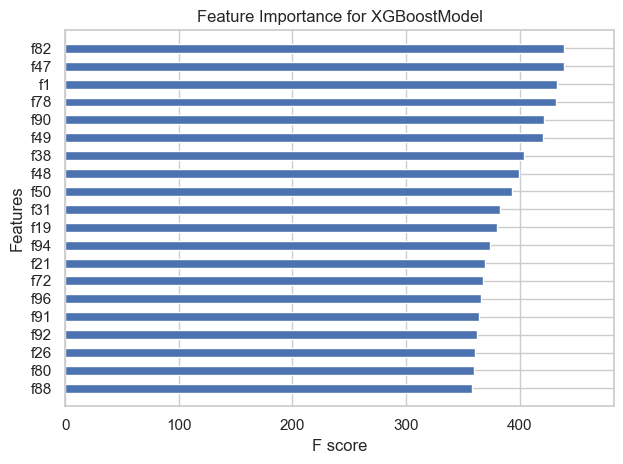

Feature importance plot saved to feature_importance.png


In [12]:
ma = ModelAnalyzer(fourierTestML)
ma.plot_label_distribution()
ma.plot_feature_importance()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


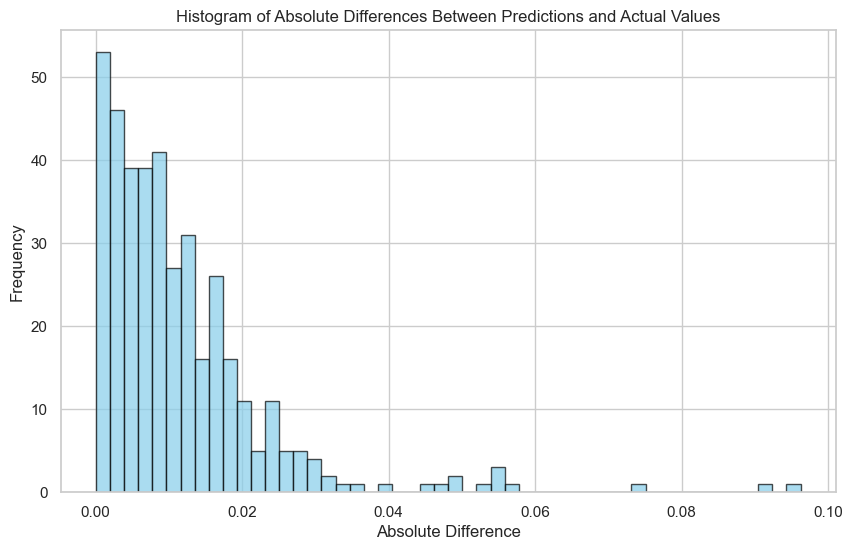

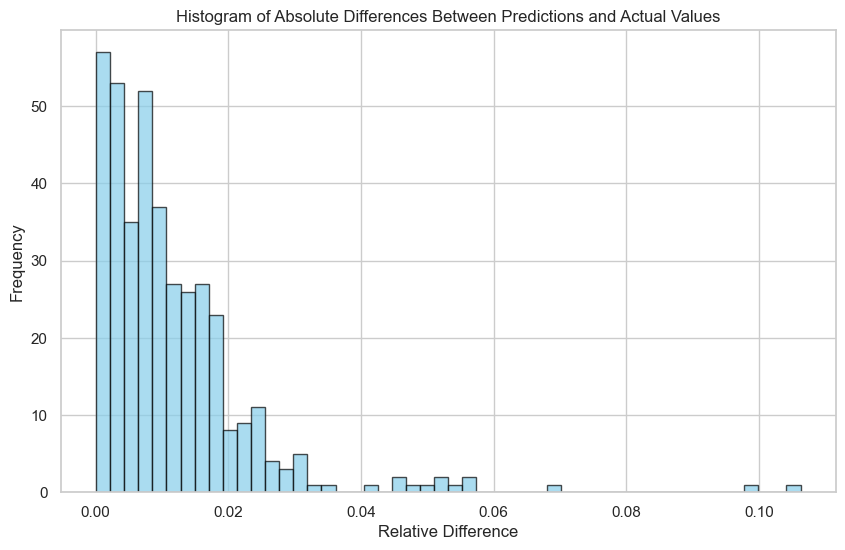

In [11]:
ma.plot_lstm_absolute_diff_histogram()